In [6]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm

In [7]:
def _get_dist_map(ann):
    dist_map = np.zeros_like(ann, dtype=np.float32)
    for cell in np.unique(ann):
        if cell == 0:
            continue #skip background

        cell_mask = (ann == cell).astype(np.uint8)
        #compute distance from every pixel to the centroid
        cell_map = cv2.distanceTransform(cell_mask, cv2.DIST_L2, 3).astype(np.float32)
        cell_map = cell_map / np.max(cell_map)
        # dist_map = 1 - dist_map
        cell_map = cell_map * cell_mask
        #add to ann
        dist_map[cell_mask > 0] = cell_map[cell_mask > 0]
    return dist_map

In [8]:

Cellpose_path = "/Users/saahilsanganeriya/Documents/Saahil/PBL/SAMCellv2.0.1/dataset_processing/CellPose-train/"
imgs = np.load(Cellpose_path + 'imgs.npy')
anns = np.load(Cellpose_path + 'anns.npy')

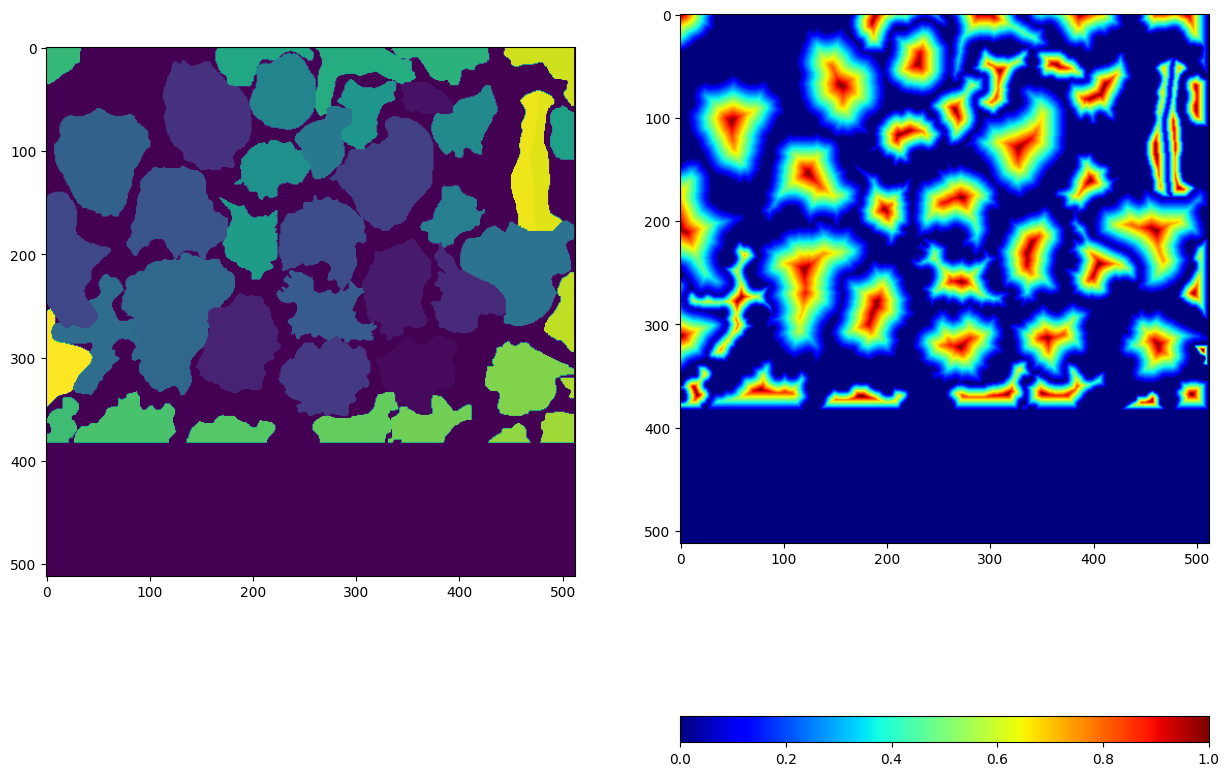

In [9]:
#calculate for a random index
random_idx = np.random.randint(0, imgs.shape[0])
ann = anns[random_idx, 0]
dist_map = _get_dist_map(ann)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 15))
ax1.imshow(ann)
ax2.imshow(dist_map, cmap='jet')
#add a colorbar
sm = plt.cm.ScalarMappable(cmap='jet', norm=plt.Normalize(vmin=0, vmax=1))
sm._A = []
plt.colorbar(sm, ax=ax2, orientation='horizontal')

In [10]:
#calculate over dataset
dist_maps = []
for ann in tqdm(anns[:, 0]):
    dist_maps.append(_get_dist_map(ann))
dist_maps = np.array(dist_maps)


100%|██████████| 796/796 [01:21<00:00,  9.72it/s]


In [11]:
print(dist_maps.shape)
print('saving shape: ', dist_maps.shape)
np.save(Cellpose_path + 'dist_maps.npy', dist_maps)
print('saved to: ', Cellpose_path + 'dist_maps.npy')

(796, 512, 512)
saving shape:  (796, 512, 512)
saved to:  /Users/saahilsanganeriya/Documents/Saahil/PBL/SAMCellv2.0.1/dataset_processing/CellPose-train/dist_maps.npy
